In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sb  
from scipy.io import loadmat  
%matplotlib inline

In [3]:
def find_closest_centroids(X, centroids):
    m = X.shape[0]
    k = centroids.shape[0]
    idx = np.zeros(m)
    
    for i in range(m):
        min_dist = 1000000
        for j in range(k):
            dist = np.sum((X[i,:] - centroids[j,:])**2)
            if dist < min_dist:
                min_dist = dist
                idx[i] = j
                
    return idx

In [4]:
data = loadmat('data/ex7data2.mat')  
X = data['X']  
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

In [5]:
idx = find_closest_centroids(X, initial_centroids)  
idx[0:3]

array([ 0.,  2.,  1.])

Same as in text--note that this is 0 indexed.

In [6]:
def compute_centroids(X, idx, k):
    m,n = X.shape
    centroids = np.zeros((k,n)) # we want k centroids
    
    for i in range(k):
        indices = np.where(idx == i) # for each centroid, get the index of the training ex in X that is assigned to that centroid
        
        # for centroid i, take the average value of all training ex in X assigned to i.
        centroids[i,:] = (np.sum(X[indices,:], axis=1)) / len(indices[0].ravel())
        
    return centroids

In [7]:
compute_centroids(X,idx,3)

array([[ 2.42830111,  3.15792418],
       [ 5.81350331,  2.63365645],
       [ 7.11938687,  3.6166844 ]])

Now we run K-means. Alternate between assigning examples to nearest cluster and recomputing cluster centroids.

In [8]:
def run_k_means(X, initial_centroids, max_iters):
    m,n = X.shape
    k = initial_centroids.shape[0] # the k for K-means
    idx = np.zeros(m)
    centroids = initial_centroids
    
    for i in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, k)
        
    return idx, centroids

In [9]:
idx, centroids = run_k_means(X, initial_centroids, 10)

In [10]:
idx, centroids

(array([ 0.,  2.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.

Now plot--remember k = 3

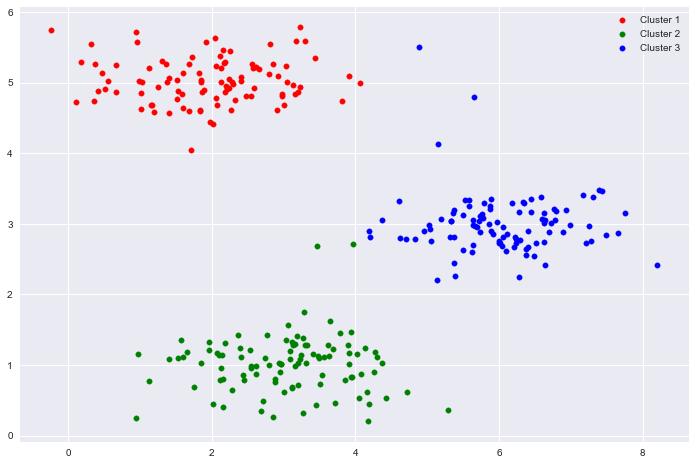

In [12]:
cluster1 = X[np.where(idx == 0)[0],:]
cluster2 = X[np.where(idx == 1)[0],:]
cluster3 = X[np.where(idx == 2)[0],:] # recall this is 0-indexed

fig,ax = plt.subplots(figsize=(12,8))
ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label='Cluster 1')
ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label='Cluster 2')
ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='b', label='Cluster 3')
ax.legend()

Now let's create a function to initialize centroids randomly

In [13]:
def init_centroids(X,k):
    m,n = X.shape
    centroids = np.zeros((k,n)) # k centroids w/ n dimensions
    idx = np.random.randint(0,m,k) # pick k random integers in range [0,m]
    
    for i in range(k):
        centroids[i,:] = X[idx[i],:] # set the ith centroid to exactly one of the training examples in X.
        
    return centroids

In [14]:
init_centroids(X,3)

array([[ 5.19590823,  3.06972937],
       [ 2.95177039,  0.89583143],
       [ 2.4051802 ,  1.11778123]])